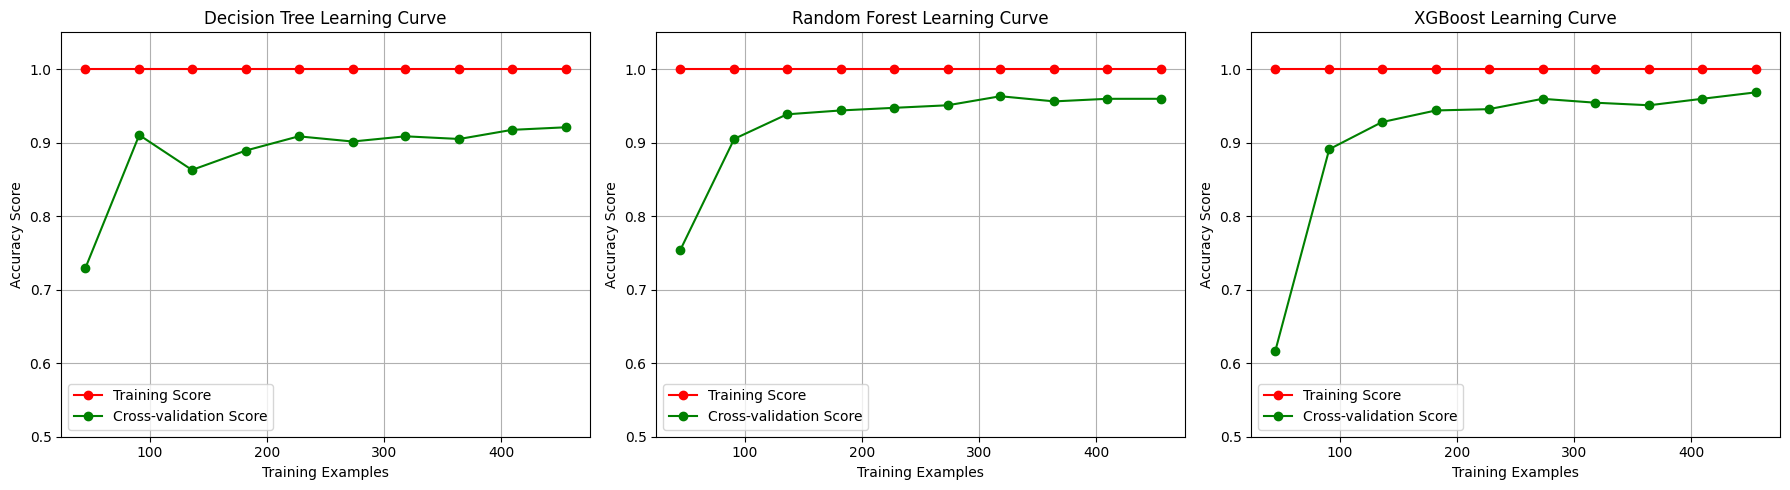

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 1. Load Data
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Define the contestants
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=None), # Prone to Overfit
    "Random Forest": RandomForestClassifier(n_estimators=100), # Reduces Variance
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1) # Reduces Bias & Variance
}

# 3. Plotting Setup
plt.figure(figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )
    
    # Calculate Mean and Std
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.subplot(1, 3, i+1)
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
    plt.title(f"{name} Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.ylim(0.5, 1.05)

plt.tight_layout()
plt.show()